# Experiment: AlexNet implementation trained on CIFAR-100

We ran the challenge pipeline on our AlexNet model trained on the CIFAR-100 dataset, which is an image classification dataset with downsampled images. We did not fine-tune this model on COCO, since the model trained on Imagenette scored higher and was chosen as the model to try fine-tuning.

## Results

This model got a score of `21.39` when taken from layer `conv2d_5_pool`, which was the max pooling layer after the last convolutional layer. It is a relatively significant improvement over the untrained baseline, which had a score of `15.12`. However, since Imagenette model scored higher, we did not test the effects of fine-tuning and layer-merging on this model.

Below is the correlation graph for subject 1.

### conv2d_5_pool (Subject 1)

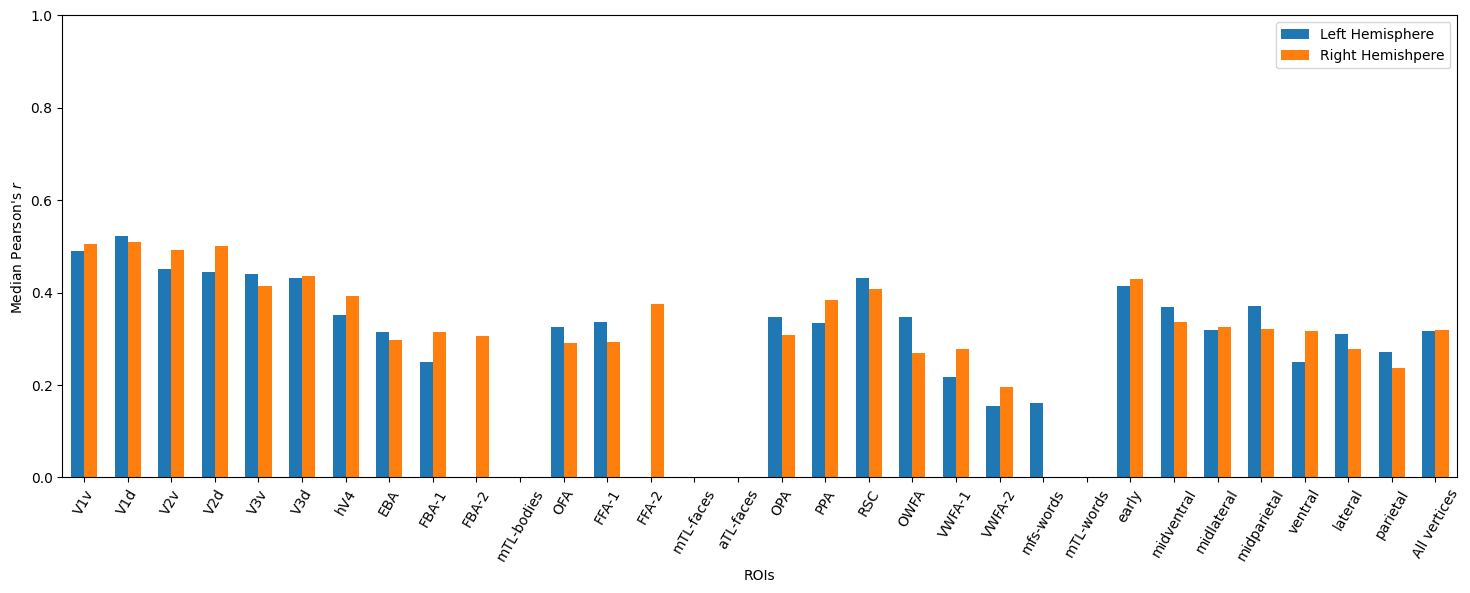

# Full Code

Below is the full code for running this model, which should generate all results for the given layers and subjects.

In [ ]:
from src.algonauts.models import model_loaders
from src.algonauts.data_processors.image_transforms import transform_alexnet

In [ ]:
experiment = 'alexnet_on_cifar100'
batch_size = 300

In [ ]:
platform = 'jupyter_notebook' #@param ['colab', 'paperspace'] {allow-input: true}

if platform == 'jupyter_notebook':
    base_dir = '../..'
    challenge_data_dir = f'{base_dir}/data/algonauts_2023_challenge_data'
    exp_output_dir = f'{base_dir}/data/out/{experiment}'

if platform == 'paperspace':
    base_dir = '.'
    challenge_data_dir = '/storage/algonauts_2023_challenge_data'
    exp_output_dir = f'/notebooks/data/out/{experiment}'

### Load model

In [ ]:
model_filename = f'{base_dir}/data/models/alexnet_cifar100.h5'
model_loader = lambda: model_loaders.load_from_file(model_filename, transform_alexnet)

### Print the model layers

In [ ]:
model, _ = model_loader()
print(*(layer.name for layer in model.layers), sep=' -> ')
del model

Metal device set to: Apple M1 Pro


2023-03-29 10:55:15.740676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-29 10:55:15.741862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


conv2d_1 -> conv2d_1_bn -> conv2d_1_pool -> conv2d_2 -> conv2d_2_bn -> conv2d_2_pool -> conv2d_3 -> conv2d_3_bn -> conv2d_4 -> conv2d_4_bn -> conv2d_5 -> conv2d_5_bn -> conv2d_5_pool -> flatten_5 -> dense_15 -> dropout_10 -> dense_16 -> dropout_11 -> dense_17


## Select layers and subjects
Now let's define which layer(s) we will pick from, and which subject(s) to process.

Best layer for all vertices was found to be 'conv2d_5_pool'

In [ ]:
layers = ['conv2d_5_pool']
subjects = [
    1, 2, 3, 4, 5, 6, 7, 8
    ]


## Run pipeline

In [ ]:
from src.algonauts.pipelines.tf_pipeline import run_tf_pipeline

run_tf_pipeline(batch_size=batch_size, model_loader=model_loader, layers=layers, subjects=subjects,
                challenge_data_dir=challenge_data_dir,
                exp_output_dir=exp_output_dir)